# Importing Libraries

In [9]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [38]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import scipy
import os
os.getcwd()

'C:\\Users\\HP'

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,ZeroPadding2D,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import pylab as pl
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
input_shape=(150,150,3)
image_width=150
image_height=150
nb_train_samples=140
nb_validation_samples=20

batch_size= 20
epochs = 15

train_data_dir="C:/Users/HP/Desktop/train"
validation_data_dir="C:/Users/HP/Desktop/validation"

In [18]:
#Rescale the pixels values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

#automatically retrieves images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=16 ,class_mode='binary')

validation_generator=datagen.flow_from_directory(
                    validation_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=32 ,class_mode='binary')

Found 139 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Creating Model

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 35, 64)       

In [24]:

from tensorflow.keras import utils
from tensorflow.keras import utils as np_utils
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


# Data Augmentation

In [25]:

train_datagen_augmented=ImageDataGenerator(
                        rescale=1./255,shear_range=0.2,zoom_range=0.2,rotation_range=30,
                        horizontal_flip=True)


train_generator_augmented=train_datagen_augmented.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='binary')

Found 139 images belonging to 2 classes.


# Fitting Model

In [26]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                           validation_data=validation_generator,
                            validation_steps=nb_validation_samples//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 1 steps
Epoch 1/15
7/7 [==============================] - 17s 2s/step - loss: 1.7281 - accuracy: 0.6168 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 12s 2s/step - loss: 0.6459 - accuracy: 0.6075 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 3/15
7/7 [==============================] - 12s 2s/step - loss: 0.5473 - accuracy: 0.7232 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 4/15
7/7 [==============================] - 12s 2s/step - loss: 0.5298 - accuracy: 0.7500 - val_loss: 0.6852 - val_accuracy: 0.5000
Epoch 5/15
7/7 [==============================] - 11s 2s/step - loss: 0.5542 - accuracy: 0.7009 - val_loss: 0.6763 - val_accuracy: 0.5500
Epoch 6/15
7/7 [==============================] - 11s 2s/step - loss: 0.4884 - accuracy: 0.8037 - val_loss: 0.6385 - val_accuracy: 0.6500
Epoch 

In [27]:
history_dict=history.history

In [28]:
history_dict

{'loss': [1.5229302388485346,
  0.6456720205110924,
  0.5473117402621678,
  0.5297827763216836,
  0.5461381969050826,
  0.4774860333059436,
  0.42704264248642965,
  0.3900688903354039,
  0.32221447995730806,
  0.2937691832814261,
  0.18777950163756577,
  0.18586418060498816,
  0.12744532901550007,
  0.12783071454440323,
  0.11275063587840055],
 'accuracy': [0.6168224,
  0.60747665,
  0.72321427,
  0.75,
  0.7009346,
  0.8037383,
  0.8037383,
  0.8411215,
  0.8660714,
  0.86915886,
  0.89719623,
  0.92523366,
  0.94392526,
  0.95327103,
  0.93457943],
 'val_loss': [0.6947028040885925,
  0.6970612406730652,
  0.685752809047699,
  0.685234546661377,
  0.6762920618057251,
  0.6385384202003479,
  0.6253437995910645,
  0.5419721603393555,
  0.4971056878566742,
  0.45550546050071716,
  0.39379575848579407,
  0.46720361709594727,
  0.5512588620185852,
  0.38298100233078003,
  0.40963634848594666],
 'val_accuracy': [0.5,
  0.5,
  0.5,
  0.5,
  0.55,
  0.65,
  0.65,
  0.65,
  0.7,
  0.75,
  0.85

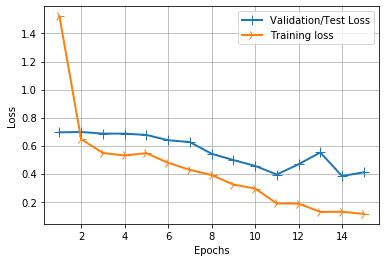

In [29]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

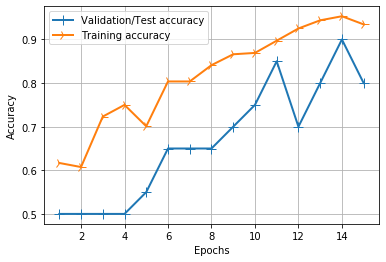

In [33]:
accuracy=history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()